In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import re
from collections import Counter
from nltk.tokenize import word_tokenize 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [19]:
df  = pd.read_csv('data.csv') #Read data

In [20]:
df.isna().sum()


id       0
label    0
tweet    0
dtype: int64

In [21]:
df.head()

id  label  \
0  1   0       
1  2   0       
2  3   0       
3  4   0       
4  5   0       

                                                                                                                        tweet  
0   @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run                      
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2    bihday your majesty                                                                                                       
3  #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦                                        
4   factsguide: society now    #motivation

In [22]:
df.drop('id',axis = 1,inplace = True) #Drop id column

In [23]:
df.head()

label  \
0  0       
1  0       
2  0       
3  0       
4  0       

                                                                                                                        tweet  
0   @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run                      
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2    bihday your majesty                                                                                                       
3  #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦                                        
4   factsguide: society now    #motivation

In [24]:
df.tweet[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

# Data Cleaning

In [25]:
df["tweets"] = df["tweet"].str.replace('[^\w\s]', '') #Begin cleaning by replacing all non-words with space


C:\Users\REDI_N~1\AppData\Local\Temp/ipykernel_20972/3199740571.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["tweets"] = df["tweet"].str.replace('[^\w\s]', '') #Begin cleaning by replacing all non-words with space


In [26]:
df

label  \
0      0       
1      0       
2      0       
3      0       
4      0       
...   ..       
31957  0       
31958  0       
31959  0       
31960  1       
31961  0       

                                                                                                                                     tweet  \
0       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run                                
1      @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked            
2        bihday your majesty                                                                                                                 
3      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦                                                  
4       factsguide: society now    #motivation                                                                                               
...                                        ...                                                                                               
31957  ate @user isz that youuu?ðððððððððâ¤ï¸                                                                   
31958    to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher   
31959  listening to sad songs on a monday morning otw to work is sad                                                                         
31960  @user #sikh #temple vandalised in in #calgary, #wso condemns  act                                                                     
31961  thank you @user for you follow                                                                                                        

                                                                                                                                 tweets  
0       user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run                               
1      user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked                
2        bihday your majesty                                                                                                             
3      model   i love u take with u all the time in urð ðððð
ððð                                                                         
4       factsguide society now    motivation                                                                                             
...                                      ...                                                                                             
31957  ate user isz that youuuðððððððððâï                                                                                                
31958    to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm shame imwithher  
31959  listening to sad songs on a monday morning otw to work is sad                                                                     
31960  user sikh temple vandalised in in calgary wso condemns  act                                                                       
31961  thank you user for you follow                                                                                                     

[31962 rows x 3 columns]

In [27]:
df.drop('tweet',axis = 1,inplace = True) #Drop 'tweet' column

In [28]:
pd.set_option('display.max_colwidth', -1)


C:\Users\REDI_N~1\AppData\Local\Temp/ipykernel_20972/2932368685.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [29]:
df

label  \
0      0       
1      0       
2      0       
3      0       
4      0       
...   ..       
31957  0       
31958  0       
31959  0       
31960  1       
31961  0       

                                                                                                                                 tweets  
0       user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run                               
1      user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked                
2        bihday your majesty                                                                                                             
3      model   i love u take with u all the time in urð ðððð
ððð                                                                         
4       factsguide society now    motivation                                                                                             
...                                      ...                                                                                             
31957  ate user isz that youuuðððððððððâï                                                                                                
31958    to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm shame imwithher  
31959  listening to sad songs on a monday morning otw to work is sad                                                                     
31960  user sikh temple vandalised in in calgary wso condemns  act                                                                       
31961  thank you user for you follow                                                                                                     

[31962 rows x 2 columns]

In [30]:
#Further cleaning
def clean(text):
  #Replace all digits with space
  text = re.sub(r"[\d-]",'',text)
  # Remove Unicode characters
  text = re.sub(r'[^\x00-\x7F]+', '',text)
  #Remove retweets
  text = re.sub('user', '', text)
  # Remove urls
  text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)
  text = re.sub("[^a-zA-Z]", ' ',text)
  # Remove mentions:
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  return text

df.tweets = df.tweets.apply(clean)

In [31]:
df.head()

label  \
0  0       
1  0       
2  0       
3  0       
4  0       

                                                                                                       tweets  
0    when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run             
1    thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked  
2    bihday your majesty                                                                                       
3  model   i love u take with u all the time in ur                                                             
4   factsguide society now    motivation

In [32]:
from wordcloud import WordCloud

# Tokenize Tweets

In [35]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ReDI_NRW_808\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
tokenized_tweet = df["tweets"].apply(lambda x: word_tokenize(x))

In [37]:
tokenized_tweet[:5]

0    [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, run]          
1    [thanks, for, lyft, credit, i, cant, use, cause, they, dont, offer, wheelchair, vans, in, pdx, disapointed, getthanked]
2    [bihday, your, majesty]                                                                                                
3    [model, i, love, u, take, with, u, all, the, time, in, ur]                                                             
4    [factsguide, society, now, motivation]                                                                                 
Name: tweets, dtype: object

In [38]:
df['tokenized'] = tokenized_tweet

# Lemmatize Tweets

In [39]:
from nltk.stem import WordNetLemmatizer

In [40]:
test = df['tokenized'][0]
test

['when',
 'a',
 'father',
 'is',
 'dysfunctional',
 'and',
 'is',
 'so',
 'selfish',
 'he',
 'drags',
 'his',
 'kids',
 'into',
 'his',
 'dysfunction',
 'run']

In [41]:

def lemma(text_list):
  lemmas = []
  for item in text_list:
    lemma = WordNetLemmatizer().lemmatize(item)
    lemmas.append(lemma)
   
  return lemmas
    


In [42]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ReDI_NRW_808\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
print(test)
print(lemma(test))

['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run']
['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drag', 'his', 'kid', 'into', 'his', 'dysfunction', 'run']


In [44]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ReDI_NRW_808\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
lemmatized_tweet = df["tokenized"].apply(lambda x: lemma(x))

In [46]:
df['lemmatized'] = lemmatized_tweet

# Remove Stop Words

In [47]:
from nltk.corpus import stopwords


In [48]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ReDI_NRW_808\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [50]:
df['lemmatized'] = df['lemmatized'].apply(lambda x: [item for item in x if item not in stop_words])

In [51]:
df.head()

label  \
0  0       
1  0       
2  0       
3  0       
4  0       

                                                                                                       tweets  \
0    when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run              
1    thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked   
2    bihday your majesty                                                                                        
3  model   i love u take with u all the time in ur                                                              
4   factsguide society now    motivation                                                                        

                                                                                                                 tokenized  \
0  [when, a, father, is, dysfunctional, and, is, so, selfish, he, drags, his, kids, into, his, dysfunction, run]             
1  [thanks, for, lyft, credit, i, cant, use, cause, they, dont, offer, wheelchair, vans, in, pdx, disapointed, getthanked]   
2  [bihday, your, majesty]                                                                                                   
3  [model, i, love, u, take, with, u, all, the, time, in, ur]                                                                
4  [factsguide, society, now, motivation]                                                                                    

                                                                                             lemmatized  
0  [father, dysfunctional, selfish, drag, kid, dysfunction, run]                                         
1  [thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, van, pdx, disapointed, getthanked]  
2  [bihday, majesty]                                                                                     
3  [model, love, u, take, u, time, ur]                                                                   
4  [factsguide, society, motivation]

In [52]:
df.isna().sum()


label         0
tweets        0
tokenized     0
lemmatized    0
dtype: int64

In [53]:
df = df.drop(["tweets", "tokenized"], axis = 1)
df.head()

label  \
0  0       
1  0       
2  0       
3  0       
4  0       

                                                                                             lemmatized  
0  [father, dysfunctional, selfish, drag, kid, dysfunction, run]                                         
1  [thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, van, pdx, disapointed, getthanked]  
2  [bihday, majesty]                                                                                     
3  [model, love, u, take, u, time, ur]                                                                   
4  [factsguide, society, motivation]

In [54]:
df.lemmatized[0]


['father', 'dysfunctional', 'selfish', 'drag', 'kid', 'dysfunction', 'run']

In [56]:
" ".join(df.lemmatized[0])
  

'father dysfunctional selfish drag kid dysfunction run'

In [57]:
def join_words(list_words):  #Detokenize tweets to be compatible with model
  return " ".join(list_words)


df['sentences'] = df.lemmatized.apply(join_words)

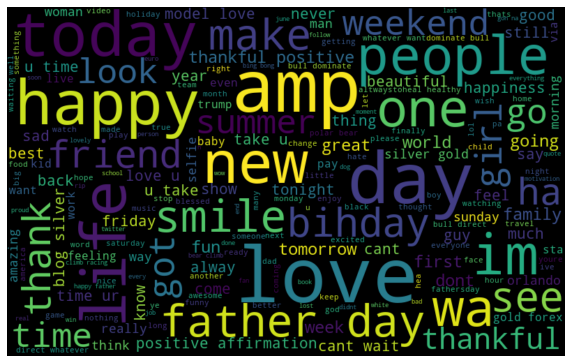

In [60]:
all_words = ' '.join([text for text in df['sentences']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


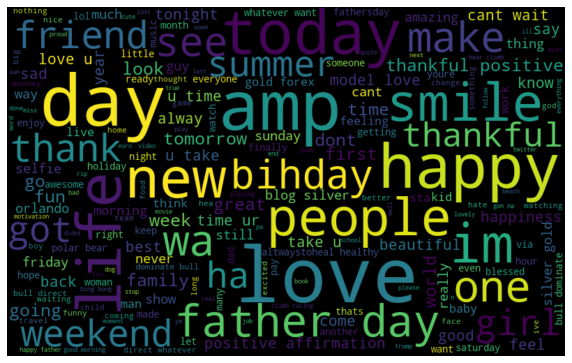

In [61]:
neutral_words =' '.join([text for text in df['sentences'][df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

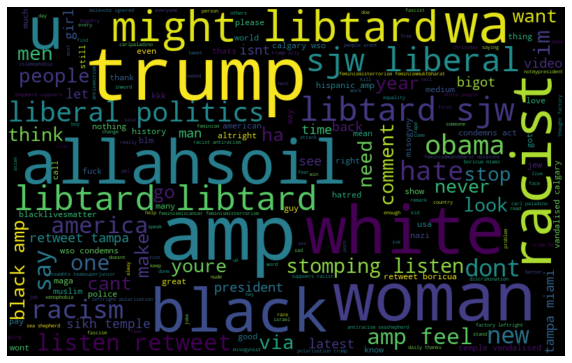

In [62]:
negative_words = ' '.join([text for text in df['sentences'][df['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [55]:
df.head()

label  \
0  0       
1  0       
2  0       
3  0       
4  0       

                                                                                             lemmatized  \
0  [father, dysfunctional, selfish, drag, kid, dysfunction, run]                                          
1  [thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, van, pdx, disapointed, getthanked]   
2  [bihday, majesty]                                                                                      
3  [model, love, u, take, u, time, ur]                                                                    
4  [factsguide, society, motivation]                                                                      

                                                                                sentences  
0  father dysfunctional selfish drag kid dysfunction run                                   
1  thanks lyft credit cant use cause dont offer wheelchair van pdx disapointed getthanked  
2  bihday majesty                                                                          
3  model love u take u time ur                                                             
4  factsguide society motivation

In [56]:
df.shape

(31962, 3)

# Vectorize Tweets

In [58]:
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit(df['sentences'])
X = vectorizer.transform(df['sentences'])

In [59]:
y = df["label"]

## Split Dataset into Training and Test Sets

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [61]:
X_train.shape

(28765, 1000)

# Build Model

In [62]:
from sklearn.ensemble import RandomForestClassifier


In [63]:
clf = RandomForestClassifier(n_estimators=500, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [105]:
import sklearn.externals
import joblib

In [106]:
filename = "Completed_model.joblib"
joblib.dump(clf, filename)

['Completed_model.joblib']

In [83]:
import pickle

In [64]:
y_pred = clf.predict(X_test)

In [65]:
print(confusion_matrix(y_test,y_pred)) #performance measurement
print(classification_report(y_test,y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)*100, "%")

[[2982   27]
 [  99   89]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3009
           1       0.77      0.47      0.59       188

    accuracy                           0.96      3197
   macro avg       0.87      0.73      0.78      3197
weighted avg       0.96      0.96      0.96      3197

Accuracy: 96.0588051298092 %
